# Quiz

***Read in the data in the file “Portfolios_Formed_on_ME_monthly_EW.csv” as we did in the lab sessions. We performed a series of analysis on the ‘Lo 10’ and the ‘Hi 10’ columns which are the returns of the lowest and highest decile portfolios. For purposes of this assignment, we will use the lowest and highest quintile portfolios, which are labelled ‘Lo 20’ and ‘Hi 20’ respectively.***


In [1]:
import pandas as pd 
import numpy as np
import stark


df = pd.read_csv(
    "../data/Portfolios_Formed_on_ME_monthly_EW.csv", 
    index_col=0, 
    na_values = -99.99, 
)
df.index = pd.to_datetime(
    df.index, 
    format="%Y%m"
).to_period("M")

portfolio = df[["Lo 20", "Hi 20"]]
portfolio.head()

,Lo 20,Hi 20
1926-07,-0.57,3.33
1926-08,3.84,2.33
1926-09,-0.48,-0.09
1926-10,-3.29,-2.95
1926-11,-0.55,3.16


<AxesSubplot:>

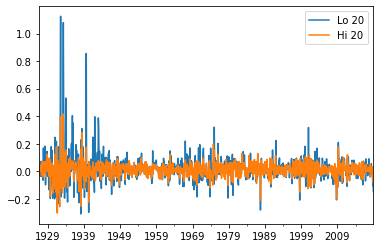

In [2]:
portfolio = portfolio / 100
portfolio.plot()

***1. What was the Annualized Return of the Lo 20 portfolio over the entire period?***

***3. What was the Annualized Return of the Hi 20 portfolio over the entire period?***    

In [3]:
n_months = len(portfolio)
annualized_returns = (portfolio + 1).prod()**(12/n_months) - 1
annualized_returns

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

***Questions 2 and 4***

***2. What was the Annualized Volatility of the Lo 20 portfolio over the entire period?***

***4. What was the Annualized Volatility of the Hi 20 portfolio over the entire period?***  

In [4]:
annualized_vol = portfolio.std() * np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

***Questions 5 and 7***

***5. What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?***

***7. What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?***

In [5]:
sub_portfolio = portfolio.loc["1999":"2015"]
n_months = len(sub_portfolio)
annualized_returns_sub_portfolio = (sub_portfolio + 1).prod()**(12/n_months) - 1
annualized_returns_sub_portfolio

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

***Questions 6 and 8***

***6. What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?***

***8. What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)?***

In [6]:
annualized_vol_sub_portfolio = portfolio.loc["1999":"2015"].std() * np.sqrt(12)
annualized_vol_sub_portfolio

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

***Questions 9 and 10***

***9. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?***

***10. At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur?*** 

In [7]:
small_cap_drawdown = stark.calculate_drawdown(
    portfolio["Lo 20"].loc["1999":"2015"]
)
small_cap_drawdown.head(3)

,wealth,peaks,drawdown
1999-01,1111.400000,1111.4,0.000000
1999-02,1067.055140,1111.4,-0.039900
1999-03,1034.189842,1111.4,-0.069471


In [8]:
small_cap_drawdown["drawdown"].min()

-0.6248092431236988

In [9]:
small_cap_drawdown["drawdown"].idxmin()

Period('2009-02', 'M')

***Questions 11 and 12***

***11. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?***

***12. Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?*** 

In [10]:
large_cap_drawdown = stark.calculate_drawdown(
    portfolio["Hi 20"].loc["1999":"2015"]
)
large_cap_drawdown.head(3)

,wealth,peaks,drawdown
1999-01,1015.300000,1015.300000,0.0000
1999-02,997.836840,1015.300000,-0.0172
1999-03,1034.557236,1034.557236,0.0000


In [11]:
large_cap_drawdown["drawdown"].min()

-0.5527349978713653

In [12]:
large_cap_drawdown["drawdown"].idxmin()

Period('2009-02', 'M')

***13. For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?***     

In [13]:
hfi_returns = stark.get_hfi_returns()
hfi_returns.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


In [14]:
sub_hfi_returns = hfi_returns.loc["2009":"2018"]
sub_hfi_returns.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008


In [15]:
stark.calculate_semideviation(sub_hfi_returns).idxmax()

'Short Selling'

***14. Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation***   

In [16]:
stark.calculate_semideviation(sub_hfi_returns).idxmin()

'Fixed Income Arbitrage'

***15. Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed?***    

In [17]:
stark.calculate_skewness(sub_hfi_returns).idxmin()

'Equity Market Neutral'

***16. Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?***     


In [18]:
stark.calculate_kurtosis(
    hfi_returns.loc["2000":]
).idxmax()

'Fixed Income Arbitrage'